In [1]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import wilson_action
from modules import utility

In [2]:
#plaquette_data_notwist = read_and_write.load_from_folder("./output_sun3/notwist_joined","plaquette:", "real")
plaquette_data_notwist = read_and_write.load_from_folder("./output_sun4/output_notwist","plaquette:", "real")

In [3]:
#plaquette_data_twist = read_and_write.load_from_folder("./output_sun3/twist_joined","plaquette:", "real")
plaquette_data_twist = read_and_write.load_from_folder("./output_sun4/output_twist","plaquette:", "real")

In [4]:
plaquette_data_notwist = utility.sort_plaquette_dict(plaquette_data_notwist )
plaquette_data_twist  = utility.sort_plaquette_dict(plaquette_data_twist )


# Computing average wilson action dependent on temperature $\beta$

$< S > = \beta \sum_{dir_1 < dir_2} \sum_{X} \frac{1}{N} \Re Tr[1 - U_{dir_1,dir_2}(X)] $

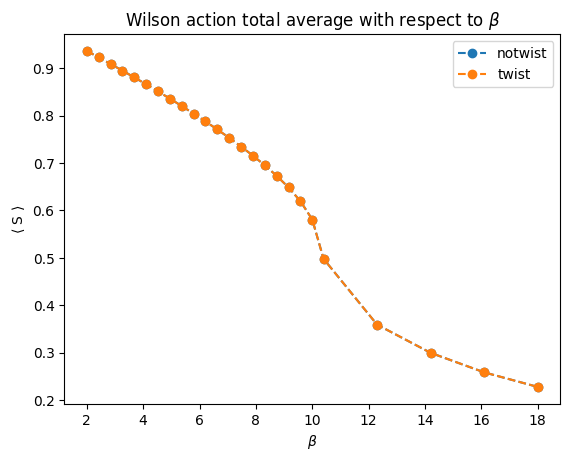

In [5]:
wilson_action.create_average_action_figure(plaquette_data_notwist,"notwist",plaquette_data_twist,"twist")

In [ ]:
wilson_action.create_z_index_heat_map(plaquette_data_twist,mean=False)

In [ ]:
wilson_action.create_z_index_heat_map(plaquette_data_twist,mean=True)

In [30]:
errors_twist = utility.compute_with_aa(plaquette_data_twist)
errors_notwist = utility.compute_with_aa(plaquette_data_notwist)

sum_errors_twist = {}
sum_errors_notwist = {}

for key,value in errors_twist.items():
    sum_errors_twist[key] = errors_twist[key]["error"].iloc[-1]

for key,value in errors_notwist.items():
    sum_errors_notwist[key] = errors_notwist[key]["error"].iloc[-1]

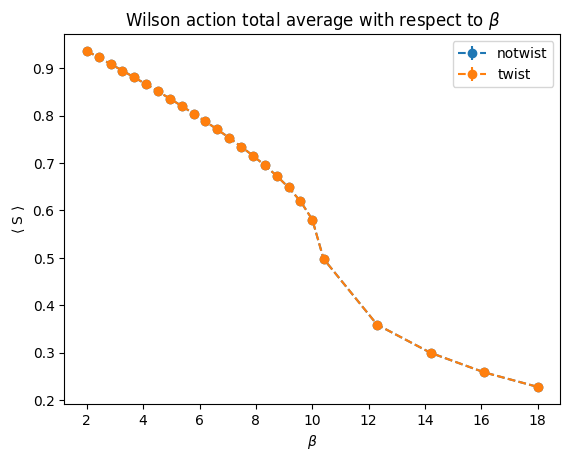

In [31]:
wilson_action.create_average_action_figure(plaquette_data_notwist,"notwist",plaquette_data_twist,"twist",errors_notwist, errors_twist)

# Jackknife method

In [6]:
jackknife_twist = utility.compute_with_aa_jackknife(plaquette_data_twist,column=21,bins=20)
jackknife_notwist = utility.compute_with_aa_jackknife(plaquette_data_notwist,column=21,bins=20)
print(jackknife_twist)

In [ ]:
jackknife_twist_data = utility.construct_jackknife_functions(jackknife_twist)
jackknife_notwist_data = utility.construct_jackknife_functions(jackknife_notwist)

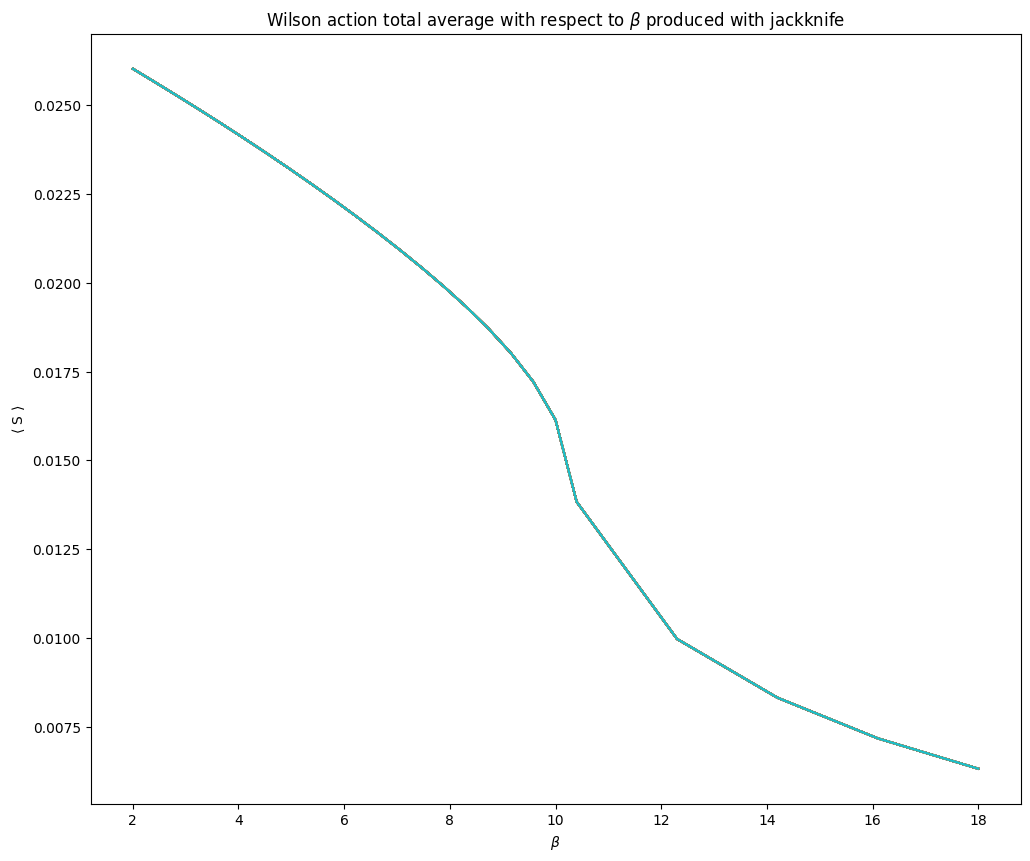

In [9]:
wilson_action.create_average_action_figure_jackknife(jackknife_notwist_data,"notwist",jackknife_twist_data,"twist",plot_fmt="-o")

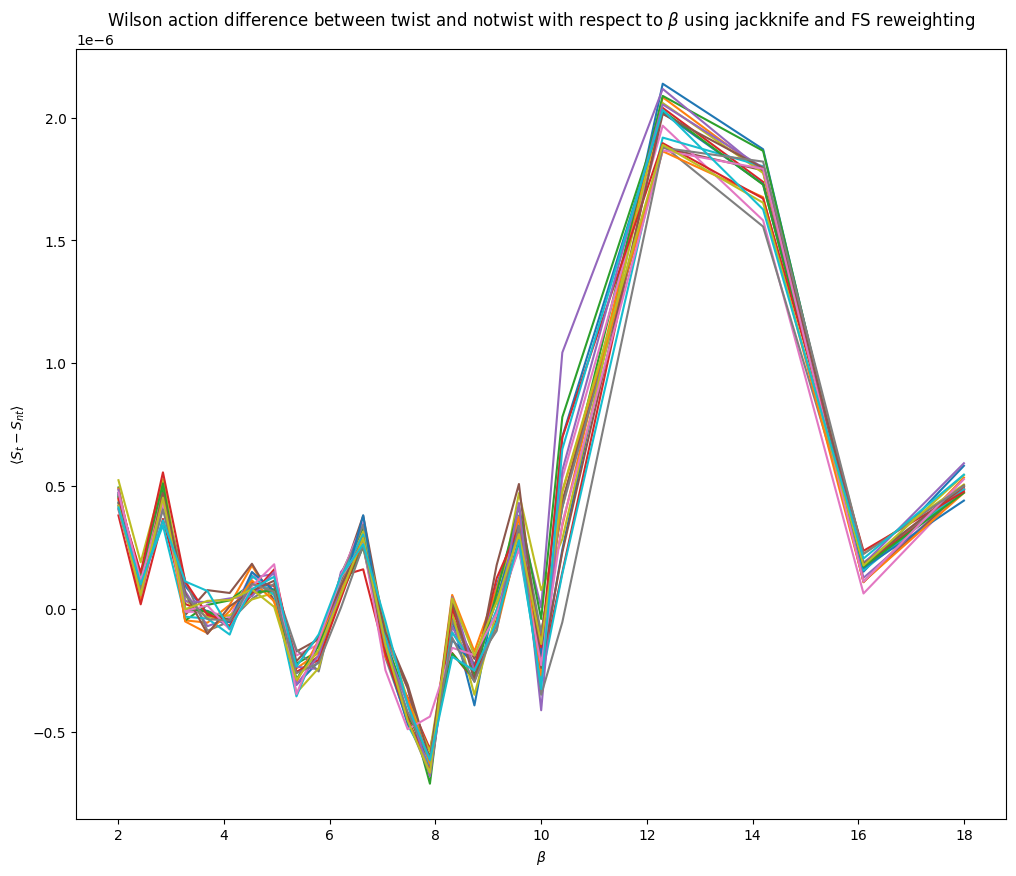

In [10]:
wilson_action.create_twist_notwist_difference_figure_jackknife(jackknife_notwist_data,jackknife_twist_data,plot_fmt="-o")

[0.00000000e+00 1.32960758e-08 2.79020114e-08 3.94407101e-08
 4.41140035e-08 4.79350704e-08 4.92029615e-08 4.95277293e-08
 5.63551958e-08 6.20751396e-08 6.47774147e-08 7.18906420e-08
 8.10751770e-08 9.00012120e-08 9.24636467e-08 9.37962986e-08
 1.00774806e-07 1.08295104e-07 1.20880249e-07 1.37619811e-07
 1.78225233e-07 4.03954103e-07 4.46375000e-07 4.58780847e-07
 4.61992324e-07]


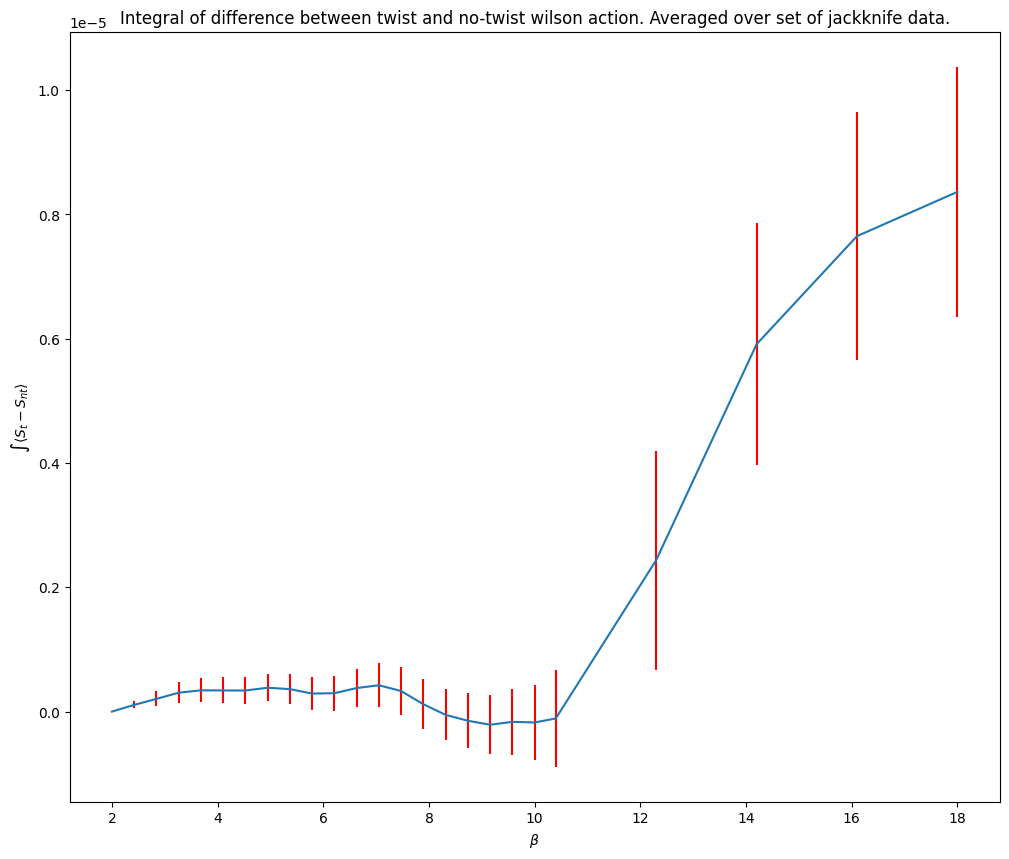

In [11]:
wilson_action.create_integral_figure_jackknife(jackknife_notwist_data,jackknife_twist_data,N=20,plot_fmt="-o")

nan


/home/haaaaron/SUN_twist_python_analysis/env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/haaaaron/SUN_twist_python_analysis/env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/haaaaron/SUN_twist_python_analysis/env/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/haaaaron/SUN_twist_python_analysis/env/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/haaaaron/SUN_twist_python_analysis/env/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret 

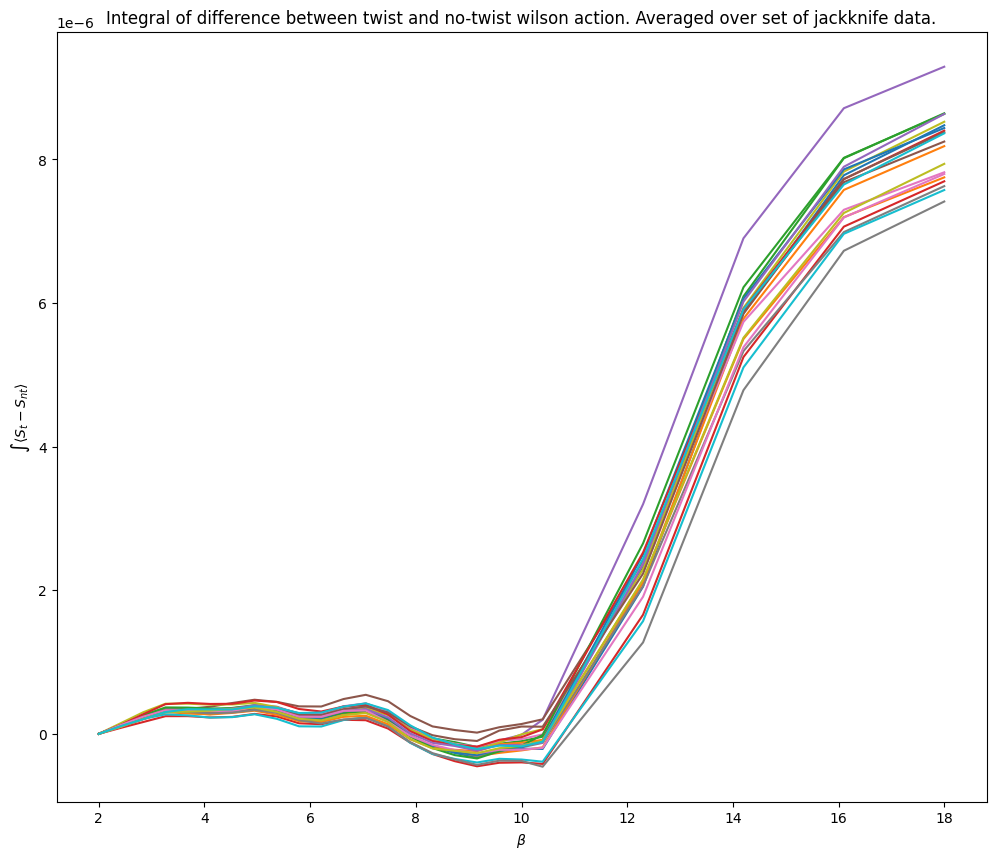

In [12]:
wilson_action.create_integral_figure_jackknife(jackknife_notwist_data,jackknife_twist_data,False)

# FS reweighting

In [29]:
len(plaquette_data_twist)

88

In [38]:
reweight_twist_data = utility.compute_with_fsh_jackknife(plaquette_data_twist,
                                   column="sum",
                                   bins=10,
                                   system_size="#1*24^2*36*6*6",
                                   min_b = 2,
                                   max_b=18)

Runnin fsh
Packing data


In [39]:
reweight_notwist_data = utility.compute_with_fsh_jackknife(plaquette_data_notwist,
                                   column="sum",
                                   bins=10,
                                   system_size="#1*24^2*36*6*6",
                                   min_b =2,
                                   max_b=18)

Runnin fsh
Packing data


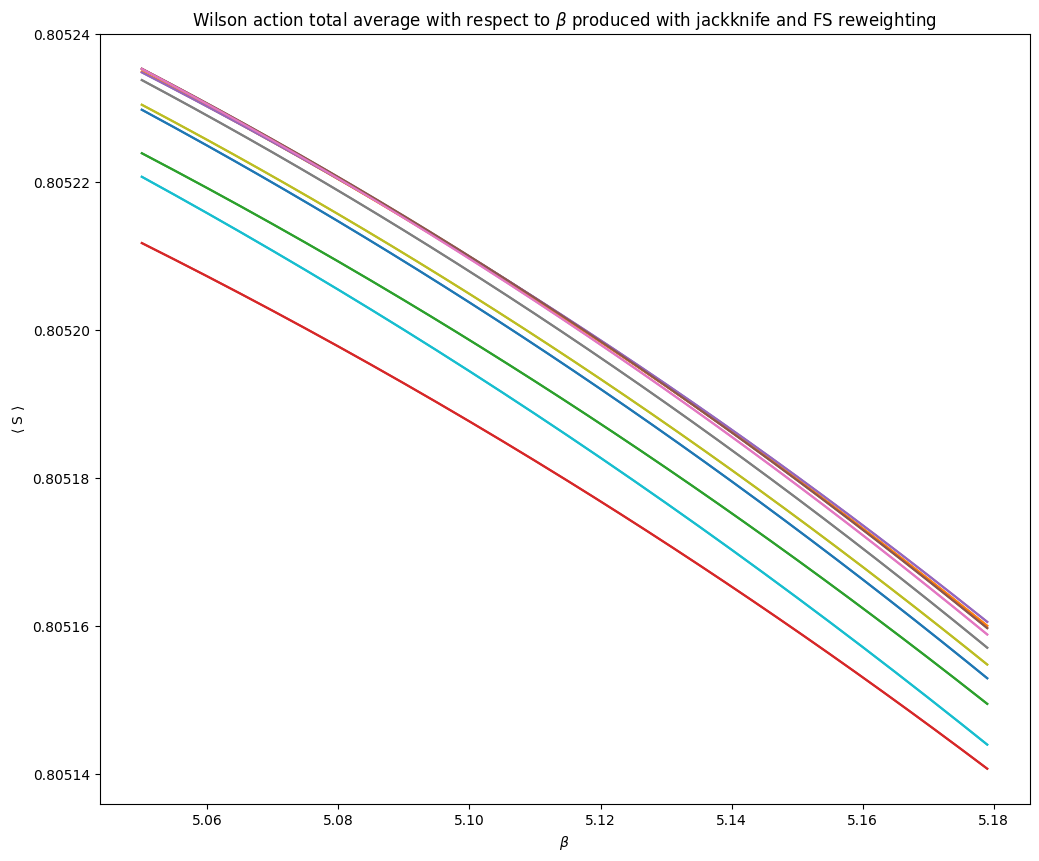

In [40]:
wilson_action.create_average_action_figure_jackknife(reweight_notwist_data,"notwist",reweight_twist_data,"twist",FS=True)

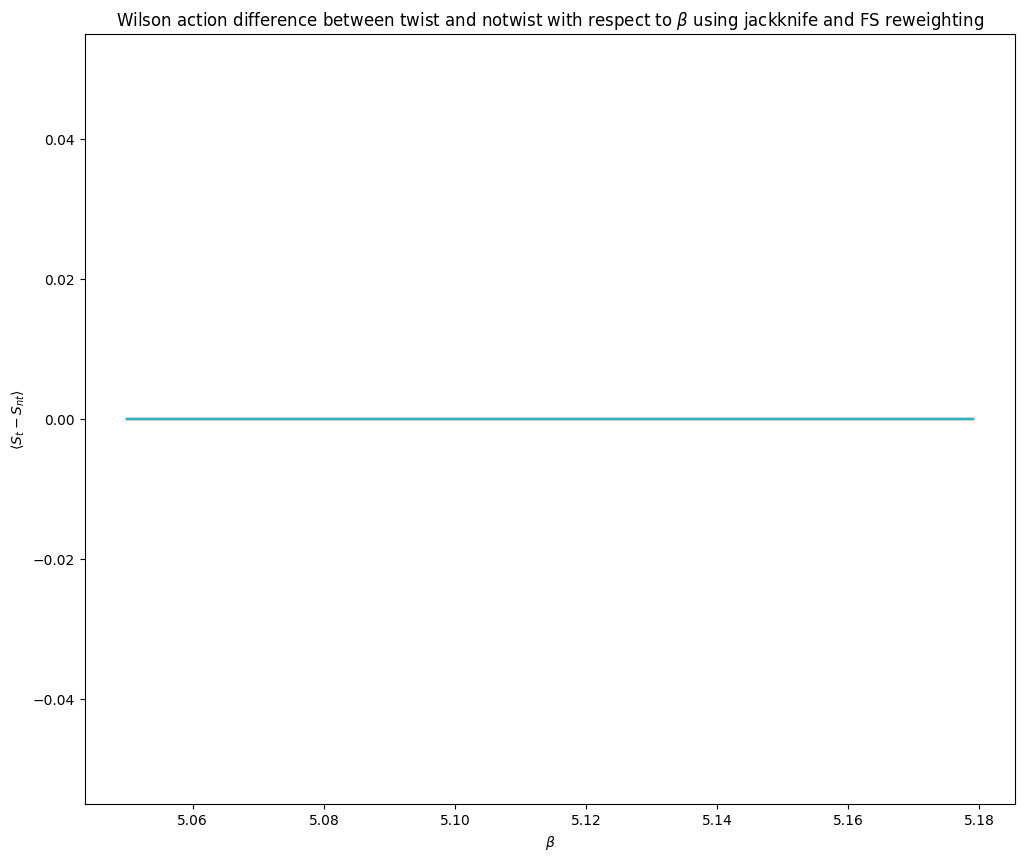

In [14]:
wilson_action.create_twist_notwist_difference_figure_jackknife(reweight_notwist_data,reweight_twist_data)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


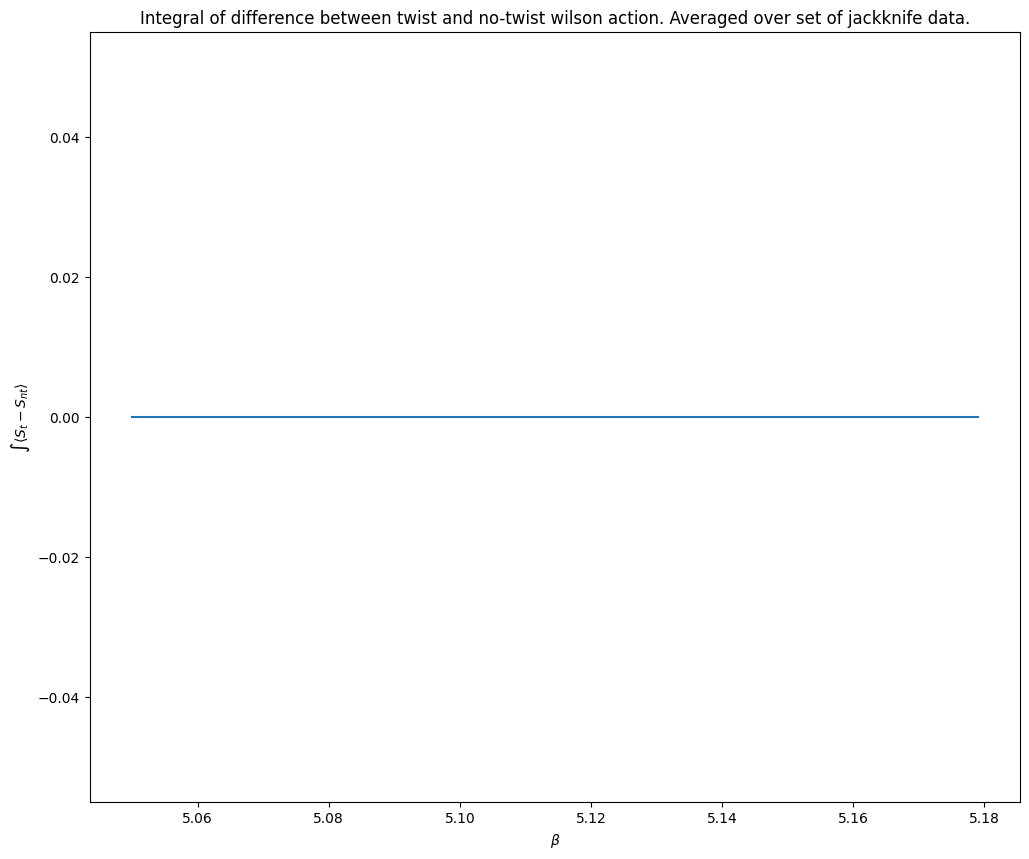

In [15]:
wilson_action.create_integral_figure_jackknife(reweight_notwist_data,reweight_twist_data)

N_t = 6
N_x = 24
N_y = 24
N_z = 36